# San Francisco Rental Prices Dashboard


In [1]:
# Initial imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact

In [2]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("sk.eyJ1IjoiYXNpbmdoMTUiLCJhIjoiY2xwZWNyNnQxMTJibjJqbnN6ZnN4eGF5NSJ9.4Ta860fv0qxTffjqhqkxJQ")
px.set_mapbox_access_token(mapbox_token)

# Import Data

In [3]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations



In [4]:
# Define Panel Visualization Functions

def housing_units_per_year():
    """Housing Units Per Year."""
    
    housing_units = sfo_data.groupby('year').mean()
    
    housing_units_per_year_plot = plt.figure()
    min = housing_units.min()['housing_units']
    max = housing_units.max()['housing_units']

    housing_units.plot.bar(ylim =(min-2000, max+2000),title="Average Housing Units/Year in San Francisco", figsize=(12,8))


    plt.close(housing_units_per_year_plot)
    
    
    return pn.pane.Matplotlib(housing_units_per_year_plot)


def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    gross_rent = pd.DataFrame(sfo_data.groupby(['year']).mean()['gross_rent'])
    
    gross_rent_plot = gross_rent.hvplot(figsize=(10, 10), title ='Average gross rent per Year')
    

    return gross_rent_plot


def average_sales_price():
    """Average Sales Price Per Year."""
    
    average_price_sf = pd.DataFrame(sfo_data.groupby(['year']).mean()['sale_price_sqr_foot'])
    
    average_sales_price_plot = average_price_sf.hvplot(figsize=(10, 10),title='Average Sales Price per Year' )
    
    
    return average_sales_price_plot


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    mean_values = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    mean_values.reset_index(inplace=True)
    mean_values.rename(columns={"level_0": "year"}, inplace=True)
    
    average_price_by_neighborhood_plot = mean_values.hvplot.line(
        x="year",
        y="sale_price_sqr_foot",
        xlabel= "Year",
        ylabel="Average Price/Square Foot",
        groupby="neighborhood",
    )
    
    return average_price_by_neighborhood_plot


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    ten_most_expensive = sfo_data.groupby("neighborhood").mean()
    ten_most_expensive = ten_most_expensive.sort_values("sale_price_sqr_foot", ascending=False).head(10)
    ten_most_expensive = ten_most_expensive.reset_index()
    ten_most_expensive
    
    
    top_most_expensive_neighborhoods_plot = ten_most_expensive.hvplot.bar(
    x="neighborhood",
    y="sale_price_sqr_foot",
    title="Top 10 Most Expensive Neighborhoods in San Francisco",
    xlabel="Neighborhood",
    ylabel="Average Price/Square Foot",
    height=500,
    color="blue",
    rot=45
)
    
    return top_most_expensive_neighborhoods_plot


def parallel_coordinates():
    ten_most_expensive = sfo_data.groupby("neighborhood").mean()
    ten_most_expensive = ten_most_expensive.sort_values("sale_price_sqr_foot", ascending=False).head(10)
    ten_most_expensive = ten_most_expensive.reset_index()
    ten_most_expensive
   
    parallel_coordinates_plot = px.parallel_coordinates(
    ten_most_expensive,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    title='Average House Value/Neighborhood',
    labels={
        'neighborhood': "Neighborhood", 
        'sale_price_sqr_foot':'Sales Price/Square Foot',
        'housing_units':'Housing Units',
        'gross_rent':'Gross Rent',
    },
)
    
    return parallel_coordinates_plot

def parallel_categories():
    """Parallel Categories Plot."""
    
    ten_most_expensive = sfo_data.groupby("neighborhood").mean()
    ten_most_expensive = ten_most_expensive.sort_values("sale_price_sqr_foot", ascending=False).head(10)
    ten_most_expensive = ten_most_expensive.reset_index()
    ten_most_expensive
    
    parallel_categories_plot = px.parallel_categories(
    ten_most_expensive,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    title='Average House Value/Neighborhood',
    labels={
        'neighborhood': "Neighborhood", 
        'sale_price_sqr_foot':'Sales Price/Square Foot',
        'housing_units':'Housing Units',
        'gross_rent':'Gross Rent',
    },
) 
       
    return parallel_categories_plot


def neighborhood_map():
    """Neighborhood Map"""
    mean_neighborhoods = sfo_data.groupby("neighborhood").mean()
    mean_neighborhoods = mean_neighborhoods.reset_index()
    
    ten_most_expensive = sfo_data.groupby("neighborhood").mean()
    ten_most_expensive = ten_most_expensive.sort_values("sale_price_sqr_foot", ascending=False).head(10)
    ten_most_expensive = ten_most_expensive.reset_index()
    values_and_locations_df = pd.concat([
                                df_neighborhood_locations,
                                mean_neighborhoods['sale_price_sqr_foot'],
                                mean_neighborhoods['housing_units'],
                                mean_neighborhoods['gross_rent']
                               ], axis=1).dropna()
    
    px.set_mapbox_access_token(mapbox_token)
    
    map = px.scatter_mapbox(
        values_and_locations_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=3,
    width=1000,
    hover_name="Neighborhood",
    title="Average Price/Square Foot and Gross Rent in San Francisco",
)
    
    plotly_panel = pn.pane.Plotly(map)
    plotly_panel._updates = True
    return plotly_panel

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

/var/folders/96/6rntsrgn6sq814w8zq_g3srh0000gp/T/ipykernel_26220/4044842210.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/96/6rntsrgn6sq814w8zq_g3srh0000gp/T/ipykernel_26220/4044842210.py:24: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/96/6rntsrgn6sq814w8zq_g3srh0000gp/T/ipykernel_26220/4044842210.py:35: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



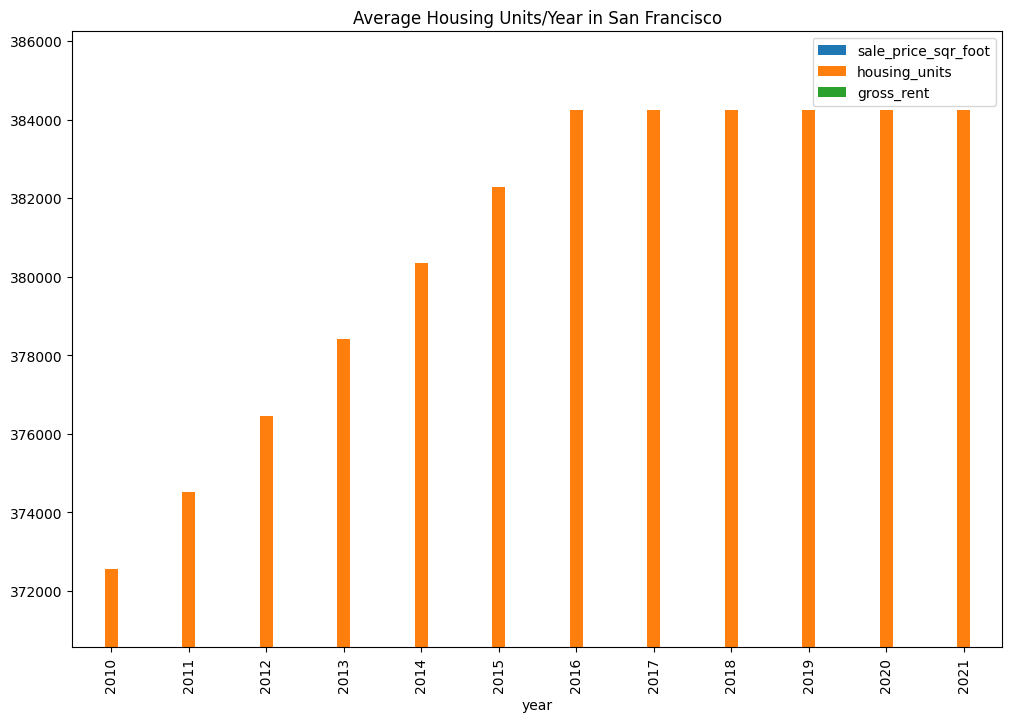

In [5]:
# Create a Title for the Dashboard
title = pn.pane.Markdown(
    """
# Real Estate Analysis of San Francisco from 2010 to 2016
""",
    width=800,
)
welcome = pn.pane.Markdown(
    """
This dashboard presents a visual analysis of the San Francisco real estate market.
"""
)
# Create a tab layout for the dashboard
tabs = pn.Tabs(
    ("Welcome", pn.Column(welcome, neighborhood_map())),
    ("Yearly Market Analysis", pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())),
    ("Neighborhood Analysis", pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods())),
    (
        "Parallel Plots Analysis",
        pn.Column(parallel_coordinates(), parallel_categories(), width=960),
    ),
)
panel = pn.Column(pn.Row(title), tabs, width=900)

## Serve the Panel Dashboard

Column(width=900)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
        [1] Row
            [0] Matplotlib(Figure)
            [1] HoloViews(Curve, height=300, sizing_mode='fixed', width=700)
            [2] HoloViews(Curve, height=300, sizing_mode='fixed', width=700)
        [2] Column
            [0] Row
                [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', width=700)
                [1] WidgetBox(align=('end', 'start'))
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
            [1] HoloViews(Bars, height=500, sizing_mode='fixed', width=700)
        [3] Column(width=960)
            [0] Plotly(Figure)
            [1] Plotly(Figure)
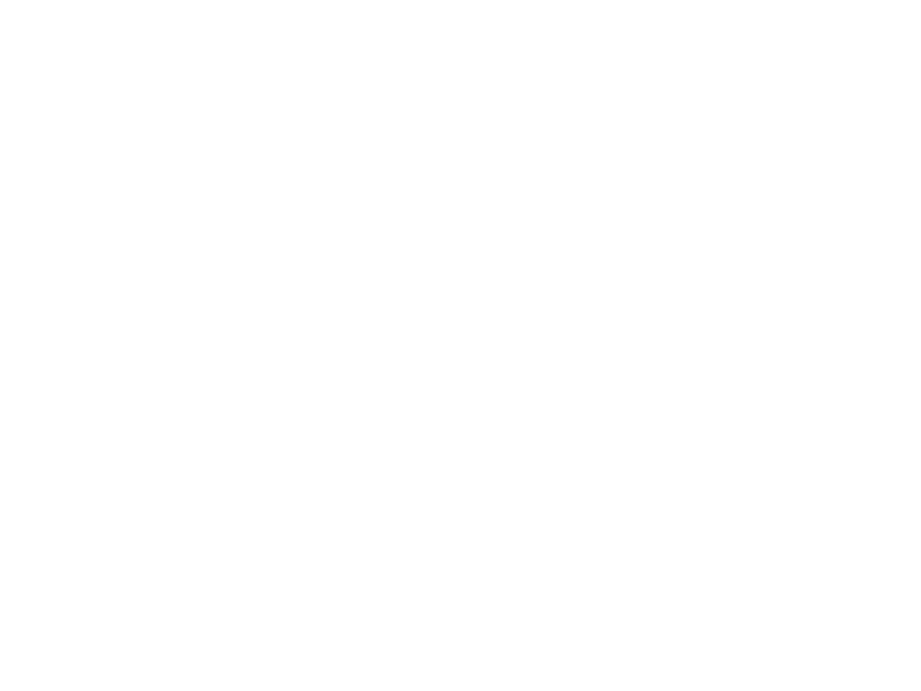

In [6]:
panel.servable()

DataFrame(value=   Year Location  ...)